# Chapter 9: Investment Projections
In this chapter you will learn how to calculate and visualize projections for investments using our Model Portfolios. We will show possible outcomes given certain investment time horizons and amounts.

In [1]:
import yfinance as yf

In [2]:
#HEADING 2: Calculating investment projections
#SKILL 2: Learn how to calculate investment projections

# Future Value (Compound)
#expectedReturn = myPortfolio.expectedReturn
expectedReturn = 0.08
initialInvestment = 5000
years = 1

valuePrincipal = initialInvestment * (1 + expectedReturn)
print(valuePrincipal)

valuePrincipal = initialInvestment * pow(1 + expectedReturn/12, (years*12))
print(valuePrincipal)

5400.0
5414.997534037549


In [3]:
# Future Value Annuity (Compound)
monthlyInvestment = 100
valueMonthly = monthlyInvestment * (pow(1 + expectedReturn/12, (years*12))-1)/(expectedReturn/12)
print(valueMonthly)

1244.9926021126466


In [4]:
# Combined future value
totalValue = valuePrincipal+valueMonthly
print(totalValue)

6659.990136150195


In [5]:
def returnProjection(expectedReturn, initialInvestment, monthlyInvestment, years):
  valuePrincipal = initialInvestment * pow(1 + expectedReturn/12, (years*12))
  valueMonthly = monthlyInvestment * (pow(1 + expectedReturn/12, (years*12))-1)/(expectedReturn/12)
  return valuePrincipal+valueMonthly

In [6]:
expectedRisk = 0.10
expectedReturnMin = expectedReturn - expectedRisk
expectedReturnMax = expectedReturn + expectedRisk
print(expectedReturnMin)
print(returnProjection(expectedReturnMin, initialInvestment, monthlyInvestment, years))
print(expectedReturnMax)
print(returnProjection(expectedReturnMax, initialInvestment, monthlyInvestment, years))

-0.020000000000000004
6089.97247567486
0.18
7282.212000384563


In [7]:
#HEADING 3: Visualizing investment projections
#SKILL 3: Learn how to visualize investment projections

In [8]:
def returnProjectionByYear(expectedReturn, expectedRisk, initialInvestment, monthlyInvestment, years):
  from datetime import date
  import pandas as pd
  df = pd.DataFrame({'date': [],
                   'lowValue': [],
                   'value': [],
                   'highValue': []})
  df.set_index('date')

  for year in range(years+1):
    newValue = returnProjection(expectedReturn, initialInvestment, monthlyInvestment, year)
    newValueLower = returnProjection(expectedReturn-expectedRisk, initialInvestment, monthlyInvestment, year)
    newValueUpper = returnProjection(expectedReturn+expectedRisk, initialInvestment, monthlyInvestment, year)
    newDate = date.today()
    newDate = newDate.replace(year=newDate.year + year)
    df = df.append(pd.Series({'date': newDate, 'lowValue': newValueLower, 'value': newValue, 'highValue': newValueUpper},name=''))
  
  df = df.set_index(pd.DatetimeIndex(df['date']))
  df = df.drop(columns="date")
  return df

In [9]:
data = returnProjectionByYear(expectedReturn, expectedRisk, initialInvestment, monthlyInvestment, years)
data


,lowValue,value,highValue
date,,,
2023-01-26,5000.000000,5000.000000,5000.000
2024-01-26,6089.972476,6659.990136,7282.212


In [10]:
years = 10
data = returnProjectionByYear(expectedReturn, expectedRisk, initialInvestment, monthlyInvestment, years)
data

,lowValue,value,highValue
date,,,
2023-01-26,5000.000000,5000.000000,5000.000000
2024-01-26,6089.972476,6659.990136,7282.212000
2025-01-26,7158.344224,8457.758635,10010.866139
2026-01-26,8205.543322,10404.741032,13273.294611
2027-01-26,9231.989361,12513.322009,17173.913375
2028-01-26,10238.093620,14796.914166,21837.564050
2029-01-26,11224.259225,17270.043346,27413.509541
2030-01-26,12190.881315,19948.441029,34080.211294
2031-01-26,13138.347196,22849.144398,42051.041054


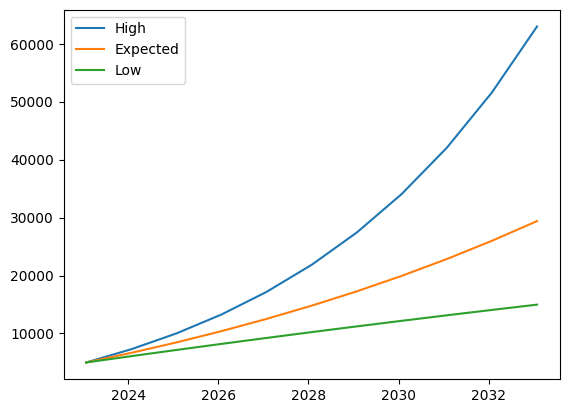

In [11]:
import matplotlib.pyplot as plt
plt.plot(data.index, data['highValue'], label="High")
plt.plot(data.index, data['value'], label="Expected")
plt.plot(data.index, data['lowValue'], label="Low")
plt.legend(loc="upper left")
plt.show()

In [12]:
years = 30
data = returnProjectionByYear(expectedReturn, expectedRisk, initialInvestment, monthlyInvestment, years)

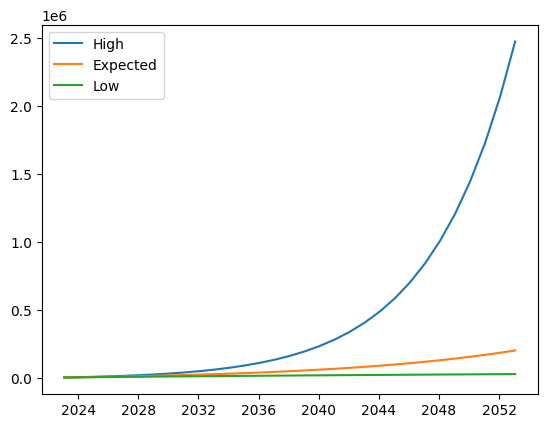

In [13]:
plt.plot(data.index, data['highValue'], label="High")
plt.plot(data.index, data['value'], label="Expected")
plt.plot(data.index, data['lowValue'], label="Low")
plt.legend(loc="upper left")
plt.show()

In [14]:
class Projection:
  def __init__(self, expectedReturn: float, expectedRisk: float, initialInvestment: float, monthlyInvestment: float, years: int):
    from datetime import date
    import pandas as pd
    df = pd.DataFrame({'date': [],
                    'lowValue': [],
                    'value': [],
                    'highValue': []})
    df.set_index('date')

    for year in range(years+1):
      newValue = self.returnProjection(expectedReturn, initialInvestment, monthlyInvestment, year)
      newValueLower = self.returnProjection(expectedReturn-expectedRisk, initialInvestment, monthlyInvestment, year)
      newValueUpper = self.returnProjection(expectedReturn+expectedRisk, initialInvestment, monthlyInvestment, year)
      newDate = date.today()
      newDate = newDate.replace(year=newDate.year + year)
      df = df.append(pd.Series({'date': newDate, 'lowValue': newValueLower, 'value': newValue, 'highValue': newValueUpper},name=''))
    
    df = df.set_index(pd.DatetimeIndex(df['date']))
    df = df.drop(columns="date")
    self.data = df

  @staticmethod
  def returnProjection(expectedReturn, initialInvestment, monthlyInvestment, years):
    valuePrincipal = initialInvestment * pow(1 + expectedReturn/12, (years*12))
    valueMonthly = monthlyInvestment * (pow(1 + expectedReturn/12, (years*12))-1)/(expectedReturn/12)
    return valuePrincipal+valueMonthly

  def visualize(self, targetAmount: float = 0.0):
    import matplotlib.pyplot as plt
    import matplotlib.ticker as ticker
    scale_y = 1e6
    ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
    fig, ax=plt.subplots()
    ax.yaxis.set_major_formatter(ticks_y)
    ax.set_ylabel('Millions (USD)')
    ax.plot(self.data.index, self.data['highValue'], label="High")
    ax.plot(self.data.index, self.data['value'], label="Expected")
    ax.plot(self.data.index, self.data['lowValue'], label="Low")
    plt.legend(loc="upper left")
    if (targetAmount > 0):
      plt.axhline(y=targetAmount)
    plt.show()

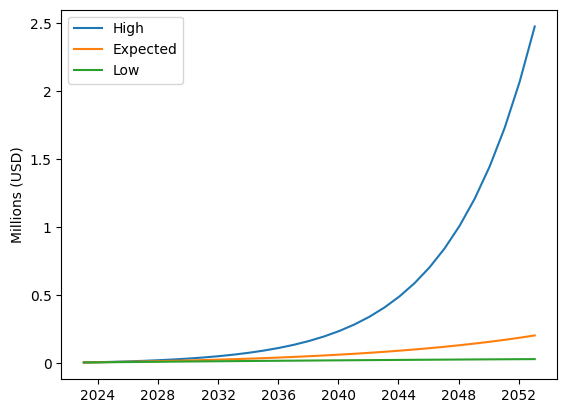

In [15]:
proj = Projection(expectedReturn, expectedRisk, initialInvestment, monthlyInvestment, years)
proj.visualize()

In [16]:
class Goal:
  def __init__(self, name, targetYear, targetValue, initialContribution=0, monthlyContribution=0, priority=""):
    self.name = name
    self.targetYear = targetYear
    self.targetValue = targetValue
    self.initialContribution = initialContribution
    self.monthlyContribution = monthlyContribution
    if not (priority == "") and not (priority in ["Dreams", "Wishes", "Wants", "Needs"]):
            raise ValueError('Wrong value set for Priority.')
    self.priority = priority

  def getGoalProbabilities(self):
    if (self.priority == ""):
            raise ValueError('No value set for Priority.')
    import pandas as pd
    lookupTable=pd.read_csv('./Data/Goal Probability Table.csv')
    match = (lookupTable['Realize'] == self.priority)
    minProb = lookupTable['MinP'][(match)]
    maxProb = lookupTable['MaxP'][(match)]
    return minProb.values[0], maxProb.values[0]

In [17]:
myGoal = Goal("Retirement", 
              targetYear=2041, 
              targetValue=3000000, 
              initialContribution=50000, 
              monthlyContribution=500, 
              priority="Wishes")

In [18]:
#HEADING 3: Calculating a Risk Score

# Interactive questionnaire

class RiskQuestion:
  def __init__(self, questionText, weight=1):
    self.questionText = questionText
    self.weight = weight
    self.answers = []

class RiskQuestionAnswer:
  def __init__(self, answerText, score, selected=False):
    self.answerText = answerText
    self.score = score
    self.selected = selected

class RiskQuestionnaire:
  def __init__(self):
    self.questions = []
    self.score = 0

  def loadQuestionnaire(self, riskQuestionsFileName, riskAnswersFileName, type):

    if not (type in ["Tolerance", "Capacity"]):
            raise ValueError('Type must be Tolerance or Capacity.')

    import pandas as pd
    riskQuestions = pd.read_csv(riskQuestionsFileName).reset_index()
    riskAnswers = pd.read_csv(riskAnswersFileName).reset_index()

    if (type == "Tolerance"):
      toleranceQuestions = riskQuestions[(riskQuestions['QuestionType'] == 'Tolerance')].reset_index()
      for index, row in toleranceQuestions.iterrows():
          self.questions.append(RiskQuestion(row['QuestionText'], row['QuestionWeight']))
          answers = riskAnswers[(riskAnswers['QuestionID'] == row['QuestionID'])]
          for indexA, rowA in answers.iterrows():
                self.questions[index].answers.append(RiskQuestionAnswer(rowA['AnswerText'],rowA['AnswerValue']))
    else:
      capacityQuestions = riskQuestions[(riskQuestions['QuestionType'] == 'Capacity')].reset_index()
      for index, row in capacityQuestions.iterrows():
          self.questions.append(RiskQuestion(row['QuestionText'], row['QuestionWeight']))
          answers = riskAnswers[(riskAnswers['QuestionID'] == row['QuestionID'])]
          for indexA, rowA in answers.iterrows():
                self.questions[index].answers.append(RiskQuestionAnswer(rowA['AnswerText'],rowA['AnswerValue']))
    

  def answerQuestionnaire(self):
    for i in range(len(self.questions)):
      question = self.questions[i]
      print(question.questionText)
      for n in range(len(question.answers)):
        answer = question.answers[n]
        print(str(n) + ": " + answer.answerText)
      nChosen = int(input("Choose your answer between 0 and " + str(len(question.answers)-1) + ": "))
      self.questions[i].answers[nChosen].selected = True
      print("\n")

  def calculateScore(self):
    print("Risk Score:")
    myTotalScore = 0
    for question in self.questions:
      for answer in question.answers:
        if (answer.selected == True):
          myTotalScore = myTotalScore + (answer.score * question.weight)
          print(answer.answerText + ": " + str(answer.score * question.weight))
    print("Total Risk Score: " + str(myTotalScore) + "\n")
    self.score = myTotalScore

In [19]:
questionsFileName = './Data/Risk Questions.csv'
answersFileName = './Data/Risk Answers.csv'

toleranceQuestionnaire = RiskQuestionnaire()
toleranceQuestionnaire.loadQuestionnaire(questionsFileName, answersFileName, "Tolerance")

capacityQuestionnaire = RiskQuestionnaire()
capacityQuestionnaire.loadQuestionnaire(questionsFileName, answersFileName, "Capacity")

toleranceQuestionnaire.answerQuestionnaire()
capacityQuestionnaire.answerQuestionnaire()

In general, how would your best friend describe you as a risk taker?
0: A real gambler
1: Willing to take risks after completing adequate research
2: Cautious
3: A real risk avoider


You are on a TV game show and can choose one of the following. Which would you take?
0: $1,000 in cash
1: A 50% chance at winning $5,000
2: A 25% chance at winning $10,000
3: A 5% chance at winning $100,000


When you think of the word risk which of the following words comes to mind first?
0: Loss
1: Uncertainty
2: Opportunity
3: Thrill


You are able to save money regularly.
0: Completely false
1: Somewhat true
2: Completely true


You can pay all your monthly bills on time -- including any credit card or other debt.
0: Completely false
1: Somewhat true
2: Completely true


If you lose money investing today, your current lifestyle would not be impacted.
0: Completely false
1: Somewhat true
2: Completely true


You do not need to draw down more than 5% of your investment portfolio for any major financial 

In [20]:
toleranceQuestionnaire.calculateScore()
capacityQuestionnaire.calculateScore()
riskTolScore = toleranceQuestionnaire.score
riskCapScore = capacityQuestionnaire.score

Risk Score:
Willing to take risks after completing adequate research: 6
A 50% chance at winning $5,000: 2
Uncertainty: 2
Total Risk Score: 10

Risk Score:
Somewhat true: 2
Somewhat true: 2
Somewhat true: 2
Somewhat true: 2
Total Risk Score: 8



In [23]:
class Allocation:
  def __init__(self, ticker, percentage):
    self.ticker = ticker
    self.percentage = percentage
    
class Portfolio:

  def __init__(self, tickerString: str, expectedReturn: float, portfolioName: str, riskBucket: int):

    self.name = portfolioName
    self.riskBucket = riskBucket
    self.expectedReturn = expectedReturn
    self.allocations = []

    from pypfopt.efficient_frontier import EfficientFrontier
    from pypfopt import risk_models
    from pypfopt import expected_returns

    df = self.__getDailyPrices(tickerString, "20y")

    mu = expected_returns.mean_historical_return(df)
    S = risk_models.sample_cov(df)

    ef = EfficientFrontier(mu, S)

    ef.efficient_return(expectedReturn)
    self.expectedRisk = ef.portfolio_performance()[1]
    portfolioWeights = ef.clean_weights()

    for key, value in portfolioWeights.items():
      newAllocation = Allocation(key, value)
      self.allocations.append(newAllocation)

  def __getDailyPrices(self, tickerStringList, period):
    data = yf.download(tickerStringList, group_by="Ticker", period=period)
    data = data.iloc[:, data.columns.get_level_values(1)=="Close"]
    data = data.dropna()
    data.columns = data.columns.droplevel(1)
    return data

  def printPortfolio(self):
    print("Portfolio Name: " + self.name)
    print("Risk Bucket: " + str(self.riskBucket))
    print("Expected Return: " + str(self.expectedReturn))
    print("Expected Risk: " + str(self.expectedRisk))
    print("Allocations: ")
    for allocation in self.allocations:
      print("Ticker: " + allocation.ticker + ", Percentage: " + str(allocation.percentage))

  @staticmethod
  def getPortfolioMapping(riskToleranceScore, riskCapacityScore):
    import pandas as pd
    allocationLookupTable=pd.read_csv('./Data/Risk Mapping Lookup.csv')
    matchTol = (allocationLookupTable['Tolerance_min'] <= riskTolScore) & (allocationLookupTable['Tolerance_max'] >= riskTolScore)
    matchCap = (allocationLookupTable['Capacity_min'] <= riskCapScore) & (allocationLookupTable['Capacity_max'] >= riskCapScore)
    portfolioID = allocationLookupTable['Portfolio'][(matchTol & matchCap)]
    return portfolioID.values[0]

In [24]:
myPortfolioID = Portfolio.getPortfolioMapping(riskTolScore, riskCapScore)

myPortfolio = Portfolio("VTI TLT IEI GLD DBC", expectedReturn = 0.06, portfolioName = "Moderate Growth", riskBucket = myPortfolioID)
myPortfolio.printPortfolio()

[*********************100%***********************]  5 of 5 completed
Portfolio Name: Moderate Growth
Risk Bucket: 2
Expected Return: 0.06
Expected Risk: 0.1152291836285203
Allocations: 
Ticker: GLD, Percentage: 0.46768
Ticker: TLT, Percentage: 0.12767
Ticker: DBC, Percentage: 0.0
Ticker: IEI, Percentage: 0.03449
Ticker: VTI, Percentage: 0.37015


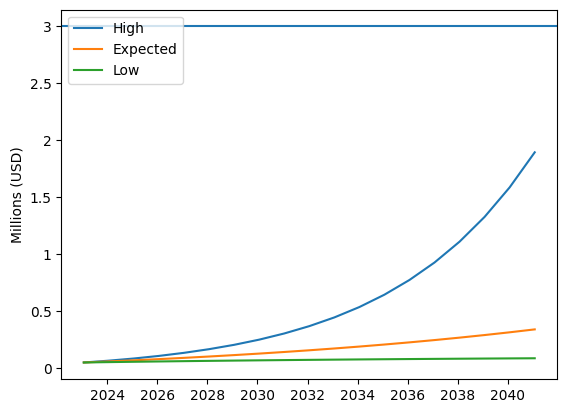

In [25]:
from datetime import date
yearsToGoal = myGoal.targetYear - date.today().year
myProjection = Projection(myPortfolio.expectedReturn, 
                          expectedRisk=myPortfolio.expectedRisk, 
                          initialInvestment=myGoal.initialContribution, 
                          monthlyInvestment=myGoal.monthlyContribution, 
                          years=yearsToGoal)
myProjection.visualize(myGoal.targetValue)

In [26]:
# Check if goal amount is achieved with expectedReturns by goalTimeline
import pandas as pd
def checkGoalPlausible(df: pd.DataFrame, goalValue) -> bool:
  maxValue = df['value'].max()
  if maxValue >= goalValue:
    return True
  else:
    return False

In [27]:
checkGoalPlausible(myProjection.data, myGoal.targetValue)

False

In [28]:
import scipy.stats as st
import math as math

minReturn = 0.022
avgReturn = 0.05
avgRisk = 0.07
timeHorizon = 10
std = avgRisk/math.sqrt(timeHorizon)
print(std)

z_score = (minReturn-avgReturn)/std
print(z_score)
print(1-st.norm.cdf(z_score))

# Use this it works! Need to add goal priority and use probs to determine if feasible. Can add risk or cash?

0.022135943621178655
-1.264911064067352
0.8970483946339659


In [29]:
# TODO: Use goal.priority, plus method to check if probability is in right range? If too high, take more risk? If too low, save more or extend timeline?
myGoal.getGoalProbabilities()

(0.65, 0.79)

In [30]:
# Many ways to calculate, this shows probability goal target amount will be exceeded over goal timeline, ideally above 50%
def goalProbability(minReturn, avgReturn, avgRisk, timeHorizon) -> float:
  import scipy.stats as st
  std = avgRisk/math.sqrt(timeHorizon)
  z_score = (minReturn-avgReturn)/std
  return 1-st.norm.cdf(z_score)

In [31]:
goalProbability(minReturn, avgReturn, avgRisk, timeHorizon)

0.8970483946339659

In [32]:
# Many ways to calculate, this shows probability goal target amount will be exceeded over goal timeline, ideally above 50%
import pandas as pd
def goalProbabilityForAmount(goalAmount, expectedReturn, portfolioRisk, years, initialInvestment, monthlyInvestment) -> float:
  import scipy.stats as st
  import math as math
  std = portfolioRisk/math.sqrt(years)
  
  amount = 0
  minReturn = 0.00
  while (amount < goalAmount):
    minReturn = minReturn + 0.0000001
    amount = Projection.returnProjection(minReturn, initialInvestment, monthlyInvestment, years)
  
  z_score = (minReturn-expectedReturn)/std
  return 1-st.norm.cdf(z_score)

In [33]:
goalProbabilityForAmount(myGoal.targetValue, 
                         myPortfolio.expectedReturn, 
                         myPortfolio.expectedRisk, 
                         yearsToGoal, 
                         myGoal.initialContribution, 
                         myGoal.monthlyContribution)

5.703690697522745e-08

In [34]:
# Reverse calculate from FV formula required monthly investment to hit goal amount by goalTimeline?
def calculateMonthlyMinimum(expectedReturn, initialInvestment, years, goalAmount) -> float:
  monthlyInvestment = (goalAmount - (initialInvestment * pow(1 + expectedReturn/12, (years*12))))/((pow(1 + expectedReturn/12, (years*12))-1)/(expectedReturn/12)) 
  return monthlyInvestment

In [35]:
calculateMonthlyMinimum(myPortfolio.expectedReturn, 
                        myGoal.initialContribution, 
                        yearsToGoal, 
                        myGoal.targetValue)

7365.788491211729

In [36]:
myGoal.monthlyContribution = calculateMonthlyMinimum(myPortfolio.expectedReturn, 
                                                     myGoal.initialContribution, 
                                                     yearsToGoal, 
                                                     myGoal.targetValue)

goalProbabilityForAmount(myGoal.targetValue, 
                         myPortfolio.expectedReturn, 
                         myPortfolio.expectedRisk, 
                         yearsToGoal, 
                         myGoal.initialContribution, 
                         myGoal.monthlyContribution)

0.4999999999897854

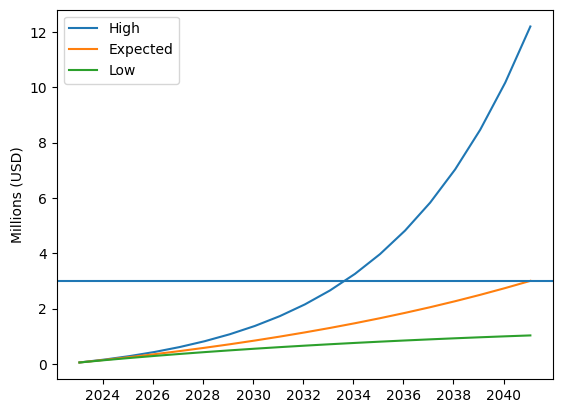

In [37]:
myProjection = Projection(myPortfolio.expectedReturn, 
                          myPortfolio.expectedRisk, 
                          myGoal.initialContribution, 
                          myGoal.monthlyContribution, 
                          yearsToGoal)
myProjection.visualize(myGoal.targetValue)

In [38]:
goalProbabilityForAmount(myGoal.targetValue, 
                         myPortfolio.expectedReturn, 
                         myPortfolio.expectedRisk, 
                         yearsToGoal+2, 
                         myGoal.initialContribution, 
                         myGoal.monthlyContribution)

0.7128942835547063

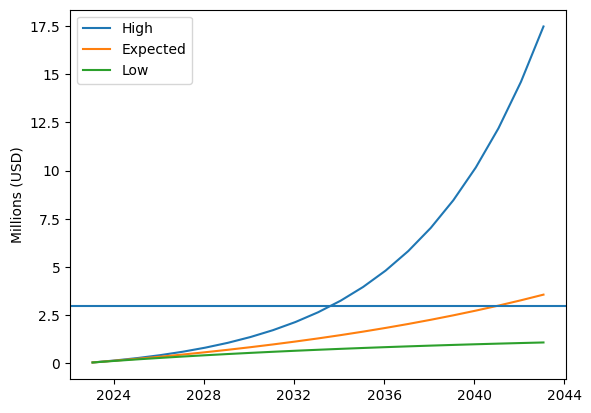

In [39]:
myProjection = Projection(myPortfolio.expectedReturn, 
                          myPortfolio.expectedRisk, 
                          myGoal.initialContribution, 
                          myGoal.monthlyContribution, 
                          yearsToGoal+2)
myProjection.visualize(myGoal.targetValue)

In [40]:
goalProbabilityForAmount(myGoal.targetValue, 
                         myPortfolio.expectedReturn, 
                         myPortfolio.expectedRisk, 
                         30, 
                         500000, 
                         1500)

0.7738803923945734

In [41]:
pip install pandas_montecarlo --upgrade --no-cache-dir

Note: you may need to restart the kernel to use updated packages.


In [42]:
import pandas_montecarlo
data = yf.download("VTI TLT IEI GLD DBC", group_by="Ticker", period="20y")
data = data.iloc[:, data.columns.get_level_values(1)=="Close"]
data = data.dropna()
data.columns = data.columns.droplevel(1)
data['Total'] = data.sum(axis=1)
data['Return'] = data['Total'].pct_change().fillna(0)
data

[*********************100%***********************]  5 of 5 completed


,DBC,TLT,VTI,GLD,IEI,Total,Return
Date,,,,,,,
2007-01-11 00:00:00-05:00,22.650000,88.449997,70.500000,60.630001,99.919998,342.149996,0.000000
2007-01-12 00:00:00-05:00,23.180000,88.040001,70.964996,62.169998,99.930000,344.284996,0.006240
2007-01-16 00:00:00-05:00,22.650000,88.230003,70.830002,61.970001,99.830002,343.510008,-0.002251
2007-01-17 00:00:00-05:00,22.850000,87.959999,70.879997,62.639999,99.820000,344.149996,0.001863
2007-01-18 00:00:00-05:00,22.610001,88.230003,70.500000,62.259998,99.910004,343.510006,-0.001860
...,...,...,...,...,...,...,...
2023-01-19 00:00:00-05:00,24.940001,107.949997,195.020004,179.889999,117.800003,625.600004,0.000960
2023-01-20 00:00:00-05:00,25.090000,106.199997,198.759995,179.289993,117.370003,626.709988,0.001774
2023-01-23 00:00:00-05:00,25.150000,105.699997,201.279999,179.630005,117.080002,628.840002,0.003399


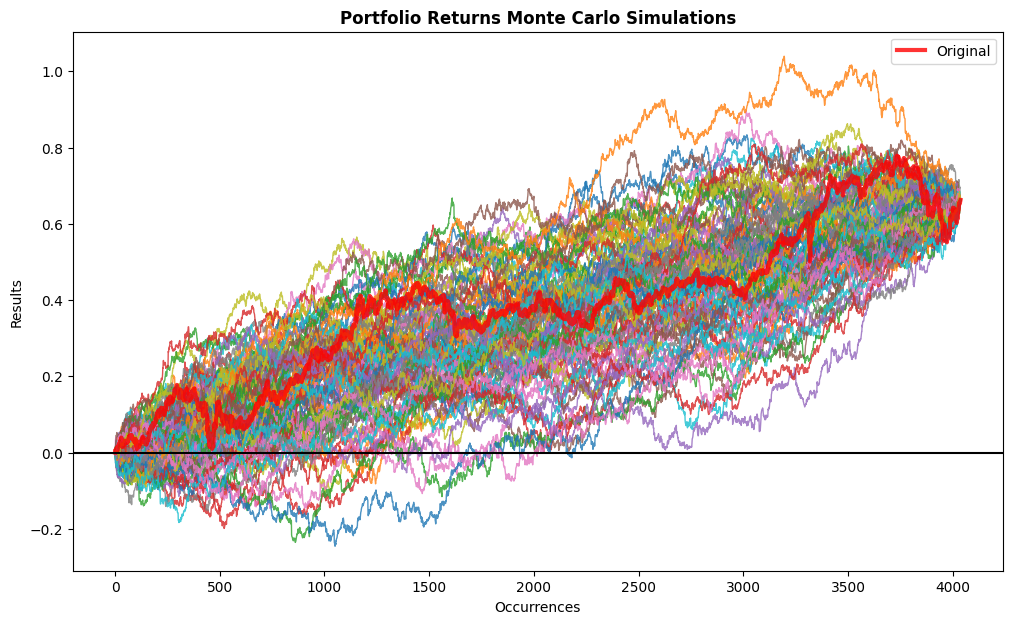

In [43]:
mc = data['Return'].montecarlo(sims=100)
mc.plot(title="Portfolio Returns Monte Carlo Simulations", figsize=(12,7))